# Phasic activation of striatal neurons ( silent to probablistic activation)

GPe and SNr receive 60pA and 70pA excitation, respectively.

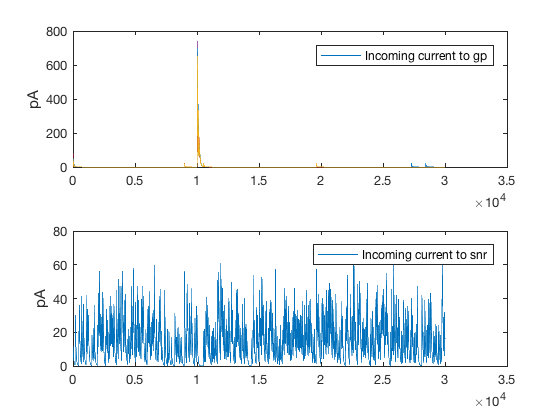

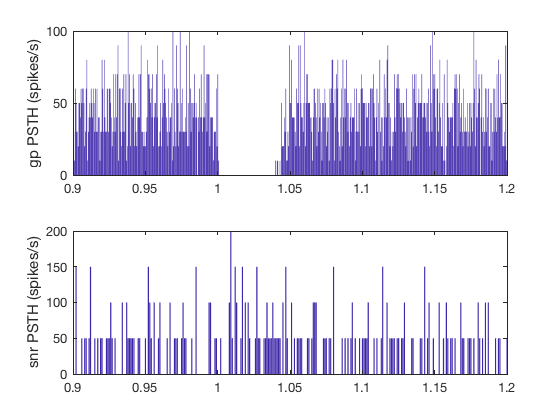

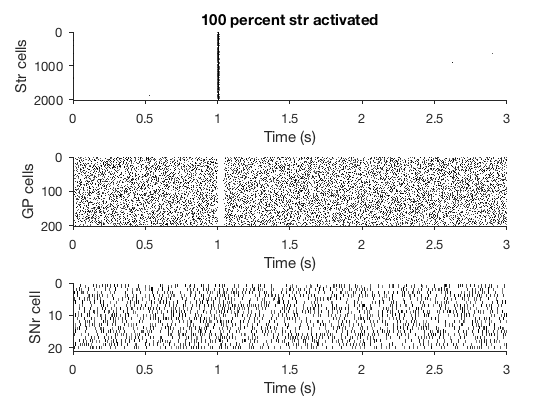

In [29]:
fr_gp=[];

spk_gp=[];
spk_snr=[];
spk_str=[];
Isnr_net=[];
dt=0.0001; % 0.1ms integration steps

%Runs 5s simulation without external current measure the baseline activity.  
[g_gp2snr] = BGdelayline_setinit2('I_exc_gp',60,'prob_syn_gp2snr',0.35); % initial conductance of gp to snr synapses 

for l = 1:20
%Silent striatum, testing different constant excitatory input to GPe
[Vm_gp,Vm_snr,Vm_str, Igp, Isnr] = BGdelayline('stimCellsPer',60,'I_exc_gp',60,'prob_syn_gp2snr',0.35,'g_gp2snr_i',g_gp2snr);

meanIsnr = mean(mean(Isnr(:,end-1/dt:end))); %average net inhibition exerted by GPe to SNr
Isnr_net = [Isnr_net, meanIsnr]; %makes an array of average inhibition across trials

spk_gp = [spk_gp; Vm_gp==15]; %binary spike array
spk_snr = [spk_snr; Vm_snr==15];
spk_str = [spk_str; Vm_str==15];
end

%fr_gp(i) = sum(sum(spk_gp(:,end-1/dt:end)))/size(spk_gp,1); %average GPe firing rate during the last 1s in simulation - from 100 cells.
%
%y(i) = mean(Isnr_net);
%e(i) = std(Isnr_net);

%%Plot
figure(1)
subplot(3,1,1)
plotRaster(spk_str);
title(sprintf('%d percent str activated',100))
ylabel('Str cells')

subplot(3,1,2)
plotRaster(spk_gp);
ylabel('GP cells')

subplot(3,1,3)
plotRaster(spk_snr);
ylabel('SNr cell')

binWidth_gp = 5; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

figure(2)
%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(2,1,1)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0.9 1.2])
ylabel('gp PSTH (spikes/s)')


binWidth_snr = 5; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(2,1,2)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0.9 1.2])
ylabel('snr PSTH (spikes/s)')

[M,I]=max(psth_snr(2:end));
tdelay = t_bar_snr(I)*dt;

figure(3)
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')




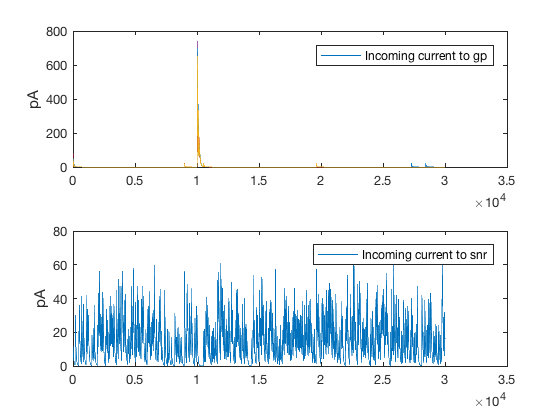

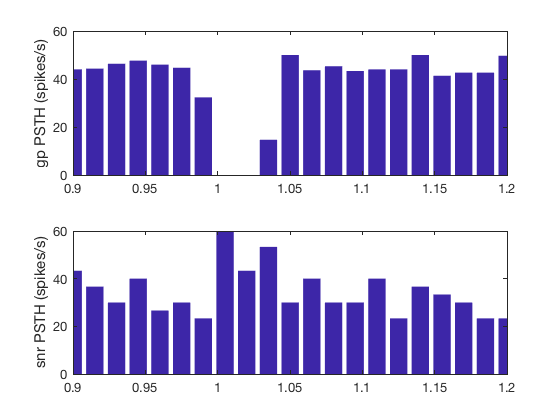

In [39]:
binWidth_gp = 150; %ms

t_bar_gp = 1:binWidth_gp:length(spk_gp);
psth_gp = zeros(1,length(t_bar_gp));

for psth_i = 1:length(t_bar_gp)-1

    psth_gp(psth_i) = sum(sum(spk_gp(:,t_bar_gp(psth_i):(t_bar_gp(psth_i)+binWidth_gp-1))));

end

figure(2)
%fr_gp = mean(psth_gp(find(1<=t_bar_gp*0.0001<=3)))/(size(spk_gp,1)*(binWidth_gp*0.0001));
subplot(2,1,1)
bar(t_bar_gp*0.0001,psth_gp/(size(spk_gp,1)*(binWidth_gp*0.0001)))
xlim([0.9 1.2])
ylabel('gp PSTH (spikes/s)')


binWidth_snr =150; %ms
t_bar_snr = 1:binWidth_snr:length(spk_snr);
psth_snr = zeros(1,length(t_bar_snr));

for psth_j = 1:length(t_bar_snr)-1
psth_snr(psth_j) = sum(sum(spk_snr(:,t_bar_snr(psth_j):(t_bar_snr(psth_j)+binWidth_snr-1))));
end

subplot(2,1,2)
bar(t_bar_snr*0.0001,psth_snr/(size(spk_snr,1)*(binWidth_snr*0.0001)))
xlim([0.9 1.2])
ylabel('snr PSTH (spikes/s)')

[M,I]=max(psth_snr(2:end));
tdelay = t_bar_snr(I)*dt;

figure(3)
subplot(2,1,1)
plot(Igp')
ylabel('pA')
legend('Incoming current to gp')

subplot(2,1,2)
plot(Isnr)
ylabel('pA')
legend('Incoming current to snr')


In [41]:
tdelay
M


tdelay =

    0.9901


M =

    18

